# Week 6 Day 3: Interactive Code Demonstrations
## Overfitting, Underfitting & Classical Regularization

**Course:** 21CSE558T - Deep Neural Network Architectures  
**Instructor:** Prof. Ramesh Babu  
**Date:** September 15, 2025

---

## 🎯 Learning Objectives
- Visualize bias-variance tradeoff with interactive examples
- Detect overfitting patterns through code demonstrations  
- Implement L1 and L2 regularization in TensorFlow
- Compare regularization techniques with real data

---

In [1]:
# 📦 Essential Imports - Your ML Toolkit
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.datasets import make_regression, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Set style for beautiful plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🚀 All libraries loaded successfully!")
print(f"TensorFlow version: {tf.__version__}")

🚀 All libraries loaded successfully!
TensorFlow version: 2.19.0


# 🍽️ HOUR 1: BIAS-VARIANCE TRADEOFF & OVERFITTING

## 🎯 Demo 1: The Archer's Target - Bias-Variance Visualization

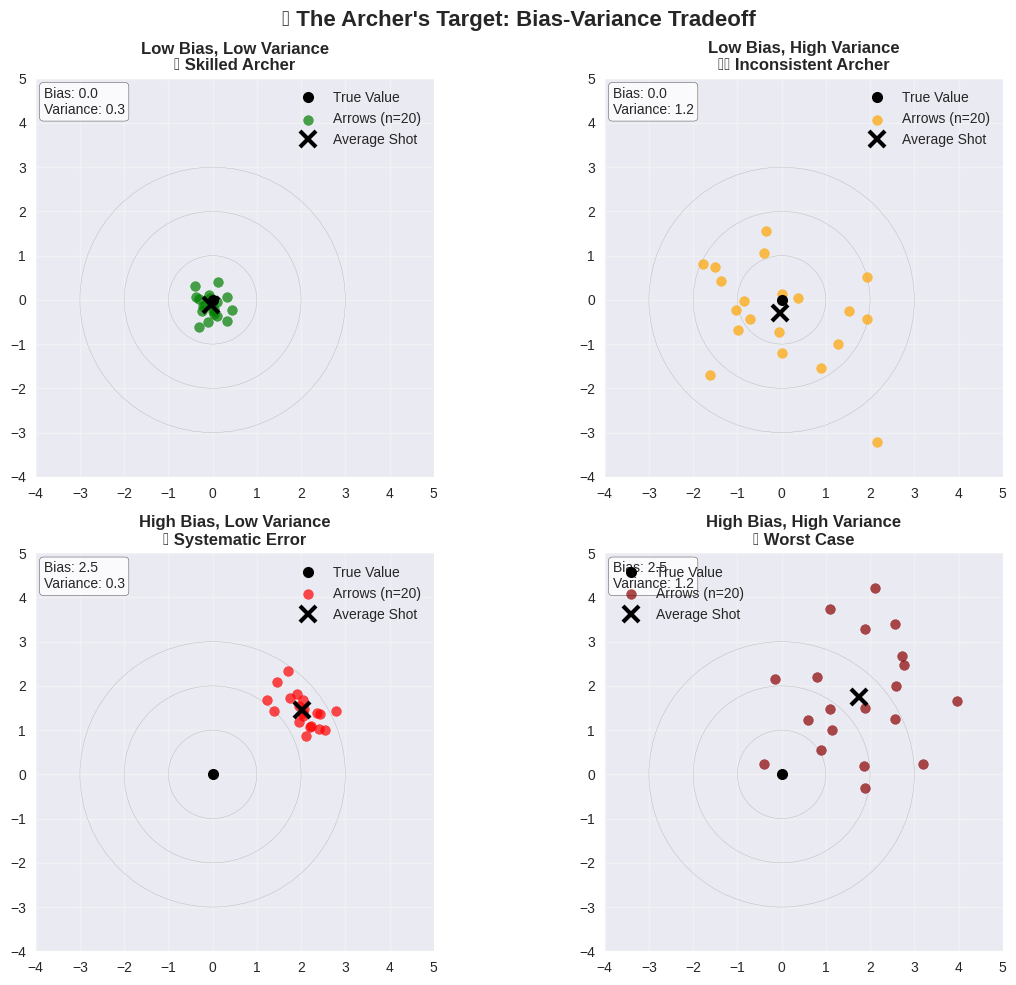

🎯 Key Insights:
✅ Green: Ideal model - accurate and consistent
⚠️ Orange: High variance - needs more data or regularization
📍 Red: High bias - needs more model complexity
❌ Dark Red: Worst case - needs complete redesign


In [2]:
def visualize_bias_variance_archery():
    """
    🏹 The Archer's Target: Visual representation of bias-variance tradeoff

    Analogy: Different archers shooting at a target represent different model behaviors
    """
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle('🏹 The Archer\'s Target: Bias-Variance Tradeoff', fontsize=16, fontweight='bold')

    # Target center (true value)
    target_x, target_y = 0, 0

    scenarios = [
        {'title': 'Low Bias, Low Variance\n✅ Skilled Archer', 'bias': (0, 0), 'variance': 0.3, 'color': 'green'},
        {'title': 'Low Bias, High Variance\n⚠️ Inconsistent Archer', 'bias': (0, 0), 'variance': 1.2, 'color': 'orange'},
        {'title': 'High Bias, Low Variance\n📍 Systematic Error', 'bias': (2, 1.5), 'variance': 0.3, 'color': 'red'},
        {'title': 'High Bias, High Variance\n❌ Worst Case', 'bias': (2, 1.5), 'variance': 1.2, 'color': 'darkred'}
    ]

    for idx, scenario in enumerate(scenarios):
        row, col = idx // 2, idx % 2
        ax = axes[row, col]

        # Draw target circles
        for radius in [1, 2, 3]:
            circle = plt.Circle((target_x, target_y), radius, fill=False, color='gray', alpha=0.5)
            ax.add_patch(circle)

        # Mark bullseye
        ax.plot(target_x, target_y, 'ko', markersize=8, label='True Value')

        # Generate arrow shots with bias and variance
        bias_x, bias_y = scenario['bias']
        variance = scenario['variance']

        # 20 shots per archer
        shots_x = np.random.normal(bias_x, variance, 20)
        shots_y = np.random.normal(bias_y, variance, 20)

        ax.scatter(shots_x, shots_y, alpha=0.7, s=50, color=scenario['color'],
                  label=f'Arrows (n=20)')

        # Mark average shot position
        avg_x, avg_y = np.mean(shots_x), np.mean(shots_y)
        ax.plot(avg_x, avg_y, 'x', markersize=12, color='black', markeredgewidth=3,
               label='Average Shot')

        ax.set_xlim(-4, 5)
        ax.set_ylim(-4, 5)
        ax.set_aspect('equal')
        ax.grid(True, alpha=0.3)
        ax.set_title(scenario['title'], fontweight='bold')
        ax.legend()

        # Add metrics
        bias_magnitude = np.sqrt(bias_x**2 + bias_y**2)
        ax.text(0.02, 0.98, f'Bias: {bias_magnitude:.1f}\nVariance: {variance:.1f}',
               transform=ax.transAxes, verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()

    print("🎯 Key Insights:")
    print("✅ Green: Ideal model - accurate and consistent")
    print("⚠️ Orange: High variance - needs more data or regularization")
    print("📍 Red: High bias - needs more model complexity")
    print("❌ Dark Red: Worst case - needs complete redesign")

# Run the demonstration
visualize_bias_variance_archery()

## 🍽️ Demo 2: The Chef's Learning Curve - Polynomial Overfitting

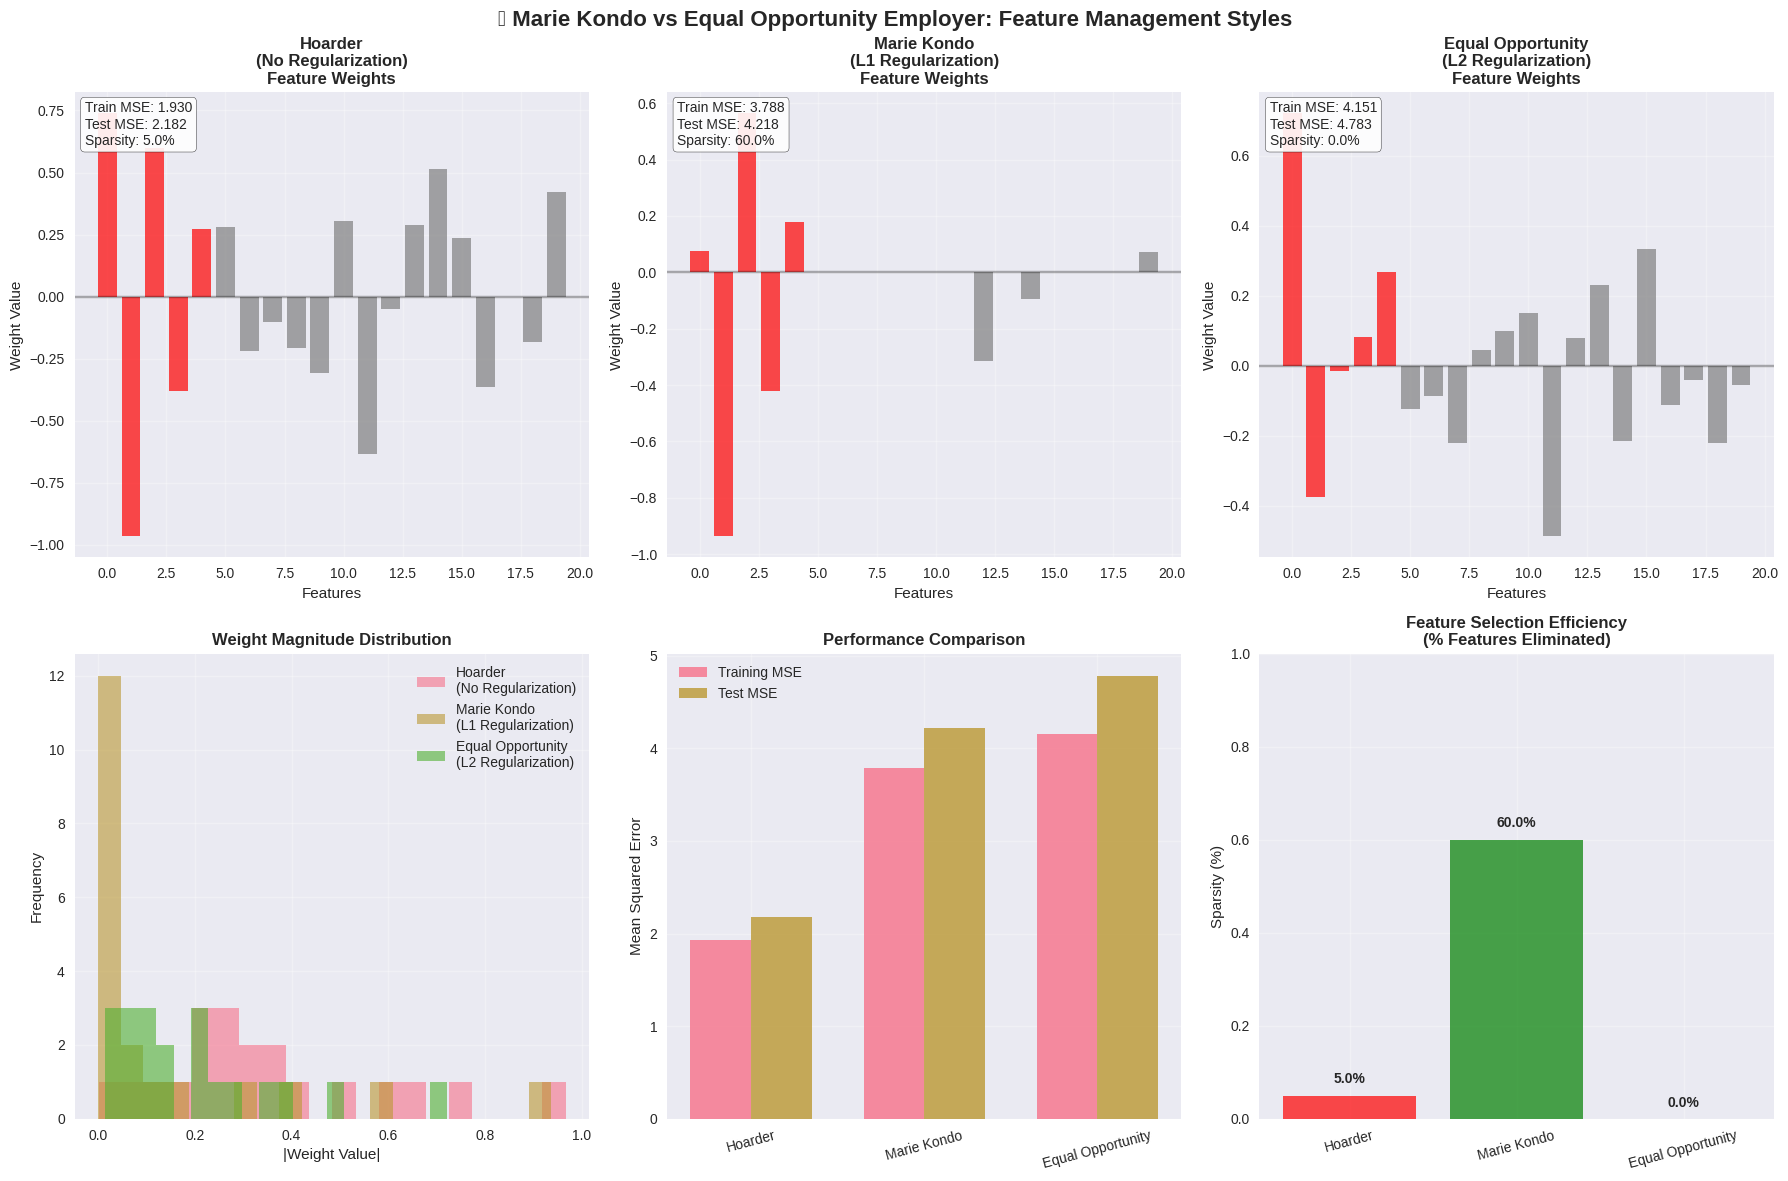

✨ Management Style Analysis:
🏠 Hoarder: Keeps everything, sparsity = 5.0%
✨ Marie Kondo: Eliminates clutter, sparsity = 60.0%
🤝 Equal Opportunity: Gives everyone a chance, sparsity = 0.0%

💡 Key Insight: L1 does feature selection, L2 does feature balancing!


In [3]:
def demonstrate_marie_kondo_vs_equal_opportunity():
    """
    ✨ Marie Kondo (L1) vs Equal Opportunity Employer (L2)

    Visual comparison of how L1 and L2 regularization affect feature selection
    """
    # Create synthetic dataset with many features (some relevant, some noise)
    np.random.seed(42)
    n_samples, n_features = 100, 20

    # Create features: first 5 are relevant, rest are noise
    X_relevant = np.random.randn(n_samples, 5)
    X_noise = np.random.randn(n_samples, 15) * 0.1  # Low-signal noise features
    X = np.column_stack([X_relevant, X_noise])

    # Create target: only depends on first 5 features
    true_weights = np.array([2, -1.5, 1, -0.5, 0.8] + [0]*15)  # Only first 5 matter
    y = X @ true_weights + np.random.randn(n_samples) * 0.1

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Build models with different regularization
    models = {}

    # No regularization (Hoarder)
    hoarder_key = 'Hoarder\n(No Regularization)'
    models[hoarder_key] = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=(n_features,), use_bias=False)
    ])

    # L1 regularization (Marie Kondo)
    marie_key = 'Marie Kondo\n(L1 Regularization)'
    models[marie_key] = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=(n_features,), use_bias=False,
                            kernel_regularizer=tf.keras.regularizers.l1(0.1))
    ])

    # L2 regularization (Equal Opportunity)
    equal_key = 'Equal Opportunity\n(L2 Regularization)'
    models[equal_key] = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=(n_features,), use_bias=False,
                            kernel_regularizer=tf.keras.regularizers.l2(0.1))
    ])

    # Train all models
    results = {}
    for name, model in models.items():
        model.compile(optimizer='adam', loss='mse')
        model.fit(X_train, y_train, epochs=200, verbose=0)

        weights = model.layers[0].get_weights()[0].flatten()
        train_pred = model.predict(X_train, verbose=0).flatten()
        test_pred = model.predict(X_test, verbose=0).flatten()

        results[name] = {
            'weights': weights,
            'train_mse': mean_squared_error(y_train, train_pred),
            'test_mse': mean_squared_error(y_test, test_pred),
            'sparsity': np.sum(np.abs(weights) < 0.01) / len(weights)
        }

    # Visualization
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('✨ Marie Kondo vs Equal Opportunity Employer: Feature Management Styles',
                fontsize=16, fontweight='bold')

    # Top row: Weight distributions
    feature_names = [f'Important_{i+1}' if i < 5 else f'Noise_{i-4}' for i in range(n_features)]
    colors = ['red' if i < 5 else 'gray' for i in range(n_features)]

    for idx, (name, result) in enumerate(results.items()):
        ax = axes[0, idx]
        bars = ax.bar(range(n_features), result['weights'], color=colors, alpha=0.7)
        ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)
        ax.set_title(f'{name}\nFeature Weights', fontweight='bold')
        ax.set_xlabel('Features')
        ax.set_ylabel('Weight Value')
        ax.grid(True, alpha=0.3)

        # Add performance metrics
        ax.text(0.02, 0.98,
               f'Train MSE: {result["train_mse"]:.3f}\nTest MSE: {result["test_mse"]:.3f}\nSparsity: {result["sparsity"]:.1%}',
               transform=ax.transAxes, verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

    # Bottom row: Weight magnitude comparisons
    weight_comparison = np.array([result['weights'] for result in results.values()])

    # Histogram of weight magnitudes
    ax = axes[1, 0]
    for idx, (name, result) in enumerate(results.items()):
        ax.hist(np.abs(result['weights']), bins=20, alpha=0.6, label=name)
    ax.set_title('Weight Magnitude Distribution', fontweight='bold')
    ax.set_xlabel('|Weight Value|')
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.grid(True, alpha=0.3)

    # Performance comparison
    ax = axes[1, 1]
    model_names = list(results.keys())
    train_errors = [results[name]['train_mse'] for name in model_names]
    test_errors = [results[name]['test_mse'] for name in model_names]

    x = np.arange(len(model_names))
    width = 0.35

    ax.bar(x - width/2, train_errors, width, label='Training MSE', alpha=0.8)
    ax.bar(x + width/2, test_errors, width, label='Test MSE', alpha=0.8)
    ax.set_title('Performance Comparison', fontweight='bold')
    ax.set_ylabel('Mean Squared Error')
    ax.set_xticks(x)
    ax.set_xticklabels([name.split('\n')[0] for name in model_names], rotation=15)
    ax.legend()
    ax.grid(True, alpha=0.3)

    # Sparsity comparison
    ax = axes[1, 2]
    sparsities = [results[name]['sparsity'] for name in model_names]
    bars = ax.bar(range(len(model_names)), sparsities,
                 color=['red', 'green', 'blue'], alpha=0.7)
    ax.set_title('Feature Selection Efficiency\n(% Features Eliminated)', fontweight='bold')
    ax.set_ylabel('Sparsity (%)')
    ax.set_xticks(range(len(model_names)))
    ax.set_xticklabels([name.split('\n')[0] for name in model_names], rotation=15)
    ax.set_ylim(0, 1)
    ax.grid(True, alpha=0.3)

    # Add percentage labels on bars
    for bar, sparsity in zip(bars, sparsities):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
               f'{sparsity:.1%}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

    print("✨ Management Style Analysis:")
    print(f"🏠 Hoarder: Keeps everything, sparsity = {results[hoarder_key]['sparsity']:.1%}")
    print(f"✨ Marie Kondo: Eliminates clutter, sparsity = {results[marie_key]['sparsity']:.1%}")
    print(f"🤝 Equal Opportunity: Gives everyone a chance, sparsity = {results[equal_key]['sparsity']:.1%}")
    print("\n💡 Key Insight: L1 does feature selection, L2 does feature balancing!")

# Run the demonstration
demonstrate_marie_kondo_vs_equal_opportunity()

## 📚 Demo 3: Student Learning Patterns - Overfitting Detection

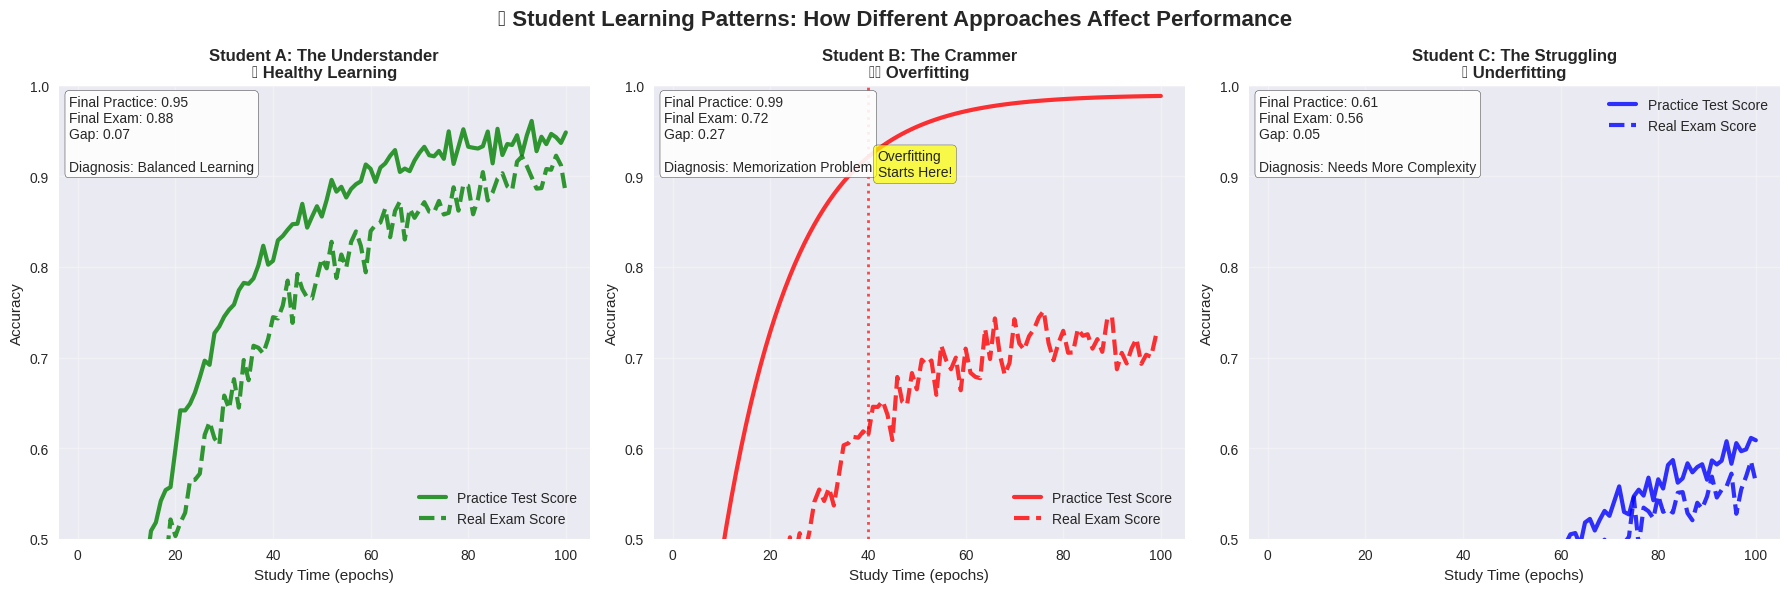

📊 Learning Pattern Analysis:
✅ Student A: Practice and exam scores stay close - healthy learning
⚠️ Student B: Perfect practice scores, declining exam scores - overfitting
📈 Student C: Both scores low but close - needs more study time/better method

🎯 Teaching Insight: Monitor the GAP between practice and real performance!


In [4]:
def simulate_student_learning_patterns():
    """
    📚 Student Learning Patterns: Cramming vs Understanding

    Shows how different learning approaches lead to different generalization patterns
    """
    # Simulate learning curves for different students
    epochs = np.arange(1, 101)

    # Student A: The Understander (Healthy Learning)
    train_acc_healthy = 0.95 * (1 - np.exp(-epochs/20)) + np.random.normal(0, 0.01, len(epochs))
    val_acc_healthy = 0.92 * (1 - np.exp(-epochs/25)) + np.random.normal(0, 0.015, len(epochs))

    # Student B: The Crammer (Overfitting)
    train_acc_overfit = 0.99 * (1 - np.exp(-epochs/15))
    val_acc_overfit = 0.85 * (1 - np.exp(-epochs/30)) - 0.1 * np.maximum(0, (epochs-40)/60)
    val_acc_overfit += np.random.normal(0, 0.02, len(epochs))

    # Student C: The Struggling (Underfitting)
    train_acc_underfit = 0.7 * (1 - np.exp(-epochs/50)) + np.random.normal(0, 0.01, len(epochs))
    val_acc_underfit = 0.68 * (1 - np.exp(-epochs/55)) + np.random.normal(0, 0.015, len(epochs))

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('📚 Student Learning Patterns: How Different Approaches Affect Performance',
                fontsize=16, fontweight='bold')

    students = [
        {
            'name': 'Student A: The Understander\n✅ Healthy Learning',
            'train': train_acc_healthy,
            'val': val_acc_healthy,
            'color': 'green',
            'diagnosis': 'Balanced Learning'
        },
        {
            'name': 'Student B: The Crammer\n⚠️ Overfitting',
            'train': train_acc_overfit,
            'val': val_acc_overfit,
            'color': 'red',
            'diagnosis': 'Memorization Problem'
        },
        {
            'name': 'Student C: The Struggling\n📈 Underfitting',
            'train': train_acc_underfit,
            'val': val_acc_underfit,
            'color': 'blue',
            'diagnosis': 'Needs More Complexity'
        }
    ]

    for idx, student in enumerate(students):
        ax = axes[idx]

        # Plot learning curves
        ax.plot(epochs, student['train'], color=student['color'], linewidth=3,
               label='Practice Test Score', alpha=0.8)
        ax.plot(epochs, student['val'], color=student['color'], linewidth=3,
               linestyle='--', label='Real Exam Score', alpha=0.8)

        ax.set_title(student['name'], fontweight='bold')
        ax.set_xlabel('Study Time (epochs)')
        ax.set_ylabel('Accuracy')
        ax.legend()
        ax.grid(True, alpha=0.3)
        ax.set_ylim(0.5, 1.0)

        # Calculate final performance gap
        final_gap = abs(student['train'][-1] - student['val'][-1])
        final_train = student['train'][-1]
        final_val = student['val'][-1]

        # Add diagnosis
        ax.text(0.02, 0.98,
               f'Final Practice: {final_train:.2f}\nFinal Exam: {final_val:.2f}\nGap: {final_gap:.2f}\n\nDiagnosis: {student["diagnosis"]}',
               transform=ax.transAxes, verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

        # Highlight overfitting point for Student B
        if idx == 1:  # Student B
            overfit_point = 40
            ax.axvline(x=overfit_point, color='red', linestyle=':', alpha=0.7, linewidth=2)
            ax.text(overfit_point+2, 0.9, 'Overfitting\nStarts Here!',
                   bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

    plt.tight_layout()
    plt.show()

    print("📊 Learning Pattern Analysis:")
    print("✅ Student A: Practice and exam scores stay close - healthy learning")
    print("⚠️ Student B: Perfect practice scores, declining exam scores - overfitting")
    print("📈 Student C: Both scores low but close - needs more study time/better method")
    print("\n🎯 Teaching Insight: Monitor the GAP between practice and real performance!")

# Run the demonstration
simulate_student_learning_patterns()

# 🛡️ HOUR 2: CLASSICAL REGULARIZATION TECHNIQUES

## ✨ Demo 4: Marie Kondo vs Equal Opportunity - L1 vs L2 Regularization

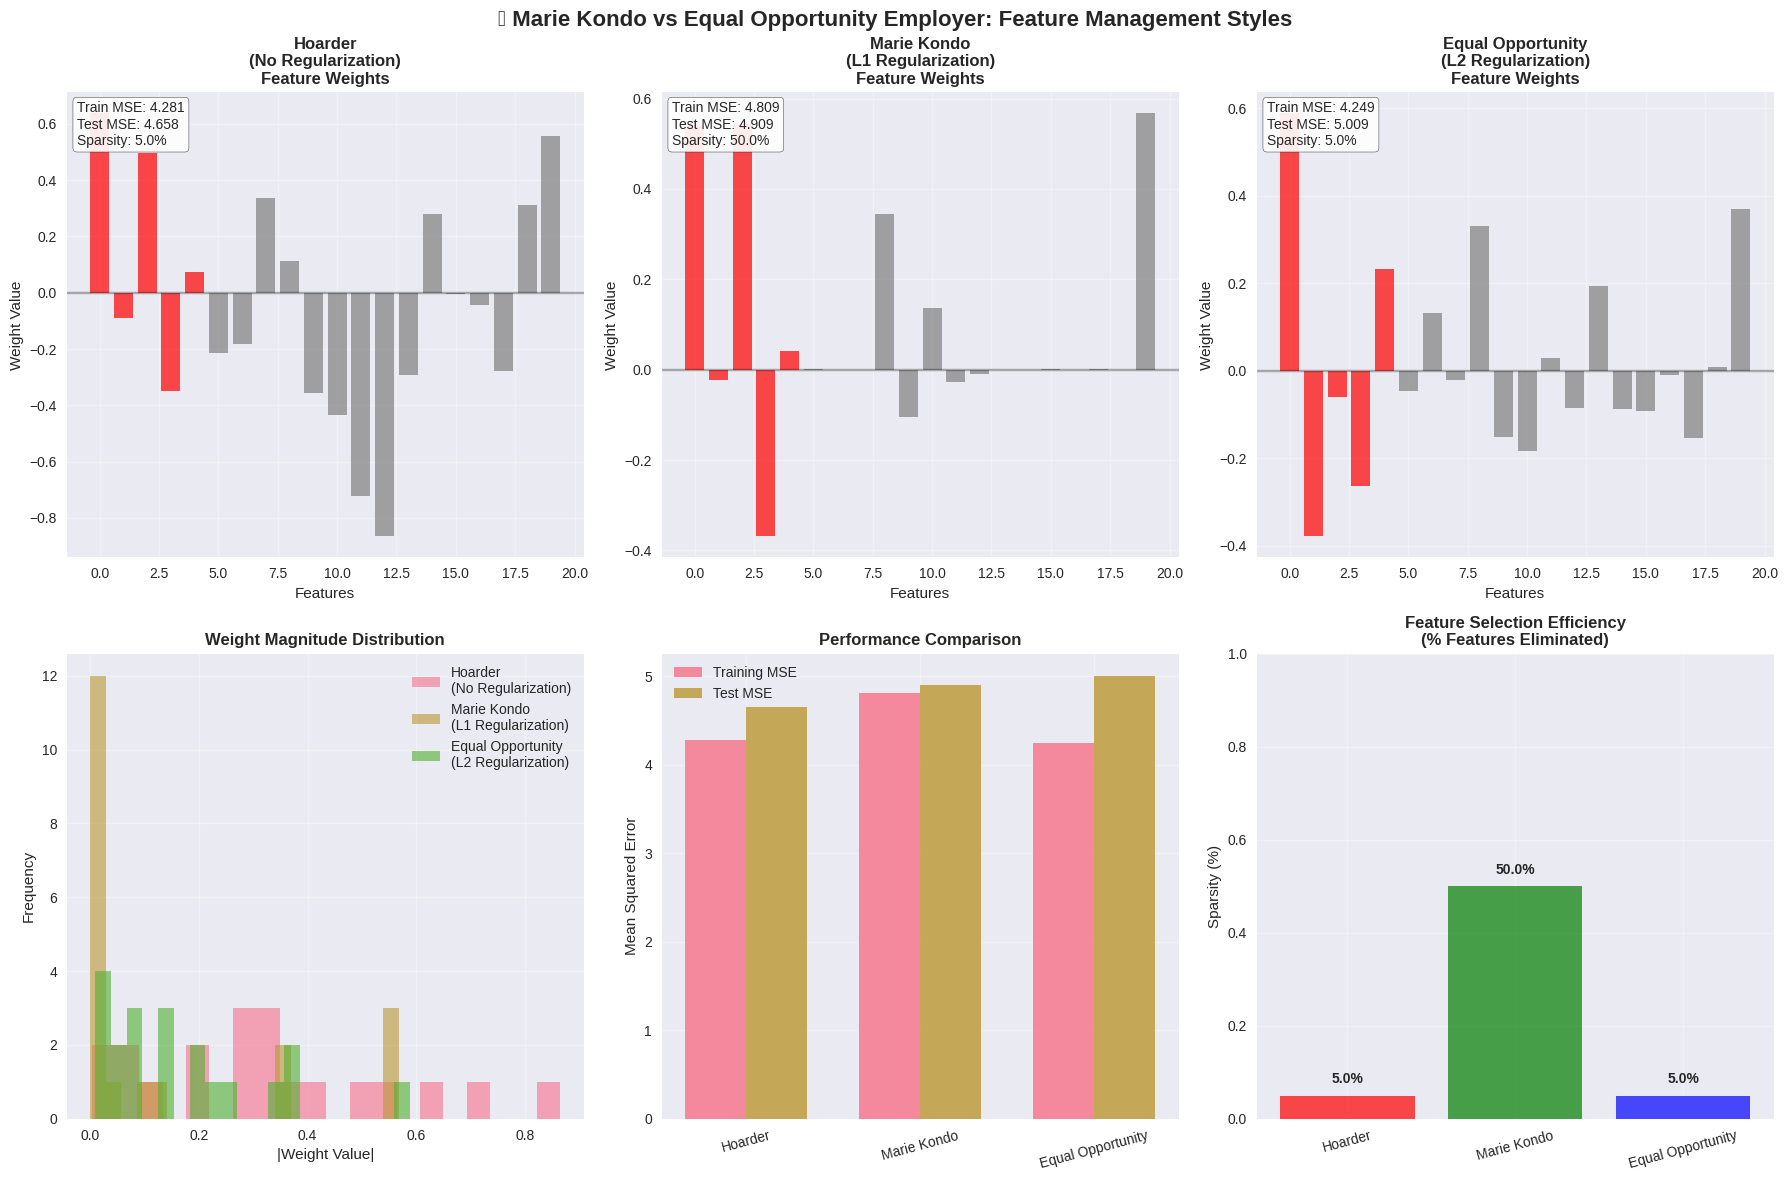

✨ Management Style Analysis:
🏠 Hoarder: Keeps everything, sparsity = 5.0%
✨ Marie Kondo: Eliminates clutter, sparsity = 50.0%
🤝 Equal Opportunity: Gives everyone a chance, sparsity = 5.0%

💡 Key Insight: L1 does feature selection, L2 does feature balancing!


In [5]:
def demonstrate_marie_kondo_vs_equal_opportunity():
    """
    ✨ Marie Kondo (L1) vs Equal Opportunity Employer (L2)

    Visual comparison of how L1 and L2 regularization affect feature selection
    """
    # Create synthetic dataset with many features (some relevant, some noise)
    np.random.seed(42)
    n_samples, n_features = 100, 20

    # Create features: first 5 are relevant, rest are noise
    X_relevant = np.random.randn(n_samples, 5)
    X_noise = np.random.randn(n_samples, 15) * 0.1  # Low-signal noise features
    X = np.column_stack([X_relevant, X_noise])

    # Create target: only depends on first 5 features
    true_weights = np.array([2, -1.5, 1, -0.5, 0.8] + [0]*15)  # Only first 5 matter
    y = X @ true_weights + np.random.randn(n_samples) * 0.1

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Build models with different regularization
    models = {}

    # No regularization (Hoarder)
    hoarder_key = 'Hoarder\n(No Regularization)'
    models[hoarder_key] = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=(n_features,), use_bias=False)
    ])

    # L1 regularization (Marie Kondo)
    marie_key = 'Marie Kondo\n(L1 Regularization)'
    models[marie_key] = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=(n_features,), use_bias=False,
                            kernel_regularizer=tf.keras.regularizers.l1(0.1))
    ])

    # L2 regularization (Equal Opportunity)
    equal_key = 'Equal Opportunity\n(L2 Regularization)'
    models[equal_key] = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=(n_features,), use_bias=False,
                            kernel_regularizer=tf.keras.regularizers.l2(0.1))
    ])

    # Train all models
    results = {}
    for name, model in models.items():
        model.compile(optimizer='adam', loss='mse')
        model.fit(X_train, y_train, epochs=200, verbose=0)

        weights = model.layers[0].get_weights()[0].flatten()
        train_pred = model.predict(X_train, verbose=0).flatten()
        test_pred = model.predict(X_test, verbose=0).flatten()

        results[name] = {
            'weights': weights,
            'train_mse': mean_squared_error(y_train, train_pred),
            'test_mse': mean_squared_error(y_test, test_pred),
            'sparsity': np.sum(np.abs(weights) < 0.01) / len(weights)
        }

    # Visualization
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('✨ Marie Kondo vs Equal Opportunity Employer: Feature Management Styles',
                fontsize=16, fontweight='bold')

    # Top row: Weight distributions
    feature_names = [f'Important_{i+1}' if i < 5 else f'Noise_{i-4}' for i in range(n_features)]
    colors = ['red' if i < 5 else 'gray' for i in range(n_features)]

    for idx, (name, result) in enumerate(results.items()):
        ax = axes[0, idx]
        bars = ax.bar(range(n_features), result['weights'], color=colors, alpha=0.7)
        ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)
        ax.set_title(f'{name}\nFeature Weights', fontweight='bold')
        ax.set_xlabel('Features')
        ax.set_ylabel('Weight Value')
        ax.grid(True, alpha=0.3)

        # Add performance metrics
        ax.text(0.02, 0.98,
               f'Train MSE: {result["train_mse"]:.3f}\nTest MSE: {result["test_mse"]:.3f}\nSparsity: {result["sparsity"]:.1%}',
               transform=ax.transAxes, verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

    # Bottom row: Weight magnitude comparisons
    weight_comparison = np.array([result['weights'] for result in results.values()])

    # Histogram of weight magnitudes
    ax = axes[1, 0]
    for idx, (name, result) in enumerate(results.items()):
        ax.hist(np.abs(result['weights']), bins=20, alpha=0.6, label=name)
    ax.set_title('Weight Magnitude Distribution', fontweight='bold')
    ax.set_xlabel('|Weight Value|')
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.grid(True, alpha=0.3)

    # Performance comparison
    ax = axes[1, 1]
    model_names = list(results.keys())
    train_errors = [results[name]['train_mse'] for name in model_names]
    test_errors = [results[name]['test_mse'] for name in model_names]

    x = np.arange(len(model_names))
    width = 0.35

    ax.bar(x - width/2, train_errors, width, label='Training MSE', alpha=0.8)
    ax.bar(x + width/2, test_errors, width, label='Test MSE', alpha=0.8)
    ax.set_title('Performance Comparison', fontweight='bold')
    ax.set_ylabel('Mean Squared Error')
    ax.set_xticks(x)
    ax.set_xticklabels([name.split('\n')[0] for name in model_names], rotation=15)
    ax.legend()
    ax.grid(True, alpha=0.3)

    # Sparsity comparison
    ax = axes[1, 2]
    sparsities = [results[name]['sparsity'] for name in model_names]
    bars = ax.bar(range(len(model_names)), sparsities,
                 color=['red', 'green', 'blue'], alpha=0.7)
    ax.set_title('Feature Selection Efficiency\n(% Features Eliminated)', fontweight='bold')
    ax.set_ylabel('Sparsity (%)')
    ax.set_xticks(range(len(model_names)))
    ax.set_xticklabels([name.split('\n')[0] for name in model_names], rotation=15)
    ax.set_ylim(0, 1)
    ax.grid(True, alpha=0.3)

    # Add percentage labels on bars
    for bar, sparsity in zip(bars, sparsities):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
               f'{sparsity:.1%}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

    print("✨ Management Style Analysis:")
    print(f"🏠 Hoarder: Keeps everything, sparsity = {results[hoarder_key]['sparsity']:.1%}")
    print(f"✨ Marie Kondo: Eliminates clutter, sparsity = {results[marie_key]['sparsity']:.1%}")
    print(f"🤝 Equal Opportunity: Gives everyone a chance, sparsity = {results[equal_key]['sparsity']:.1%}")
    print("\n💡 Key Insight: L1 does feature selection, L2 does feature balancing!")

# Run the demonstration
demonstrate_marie_kondo_vs_equal_opportunity()

## 💼 Demo 5: Investment Portfolio Theory - L2 Regularization Deep Dive

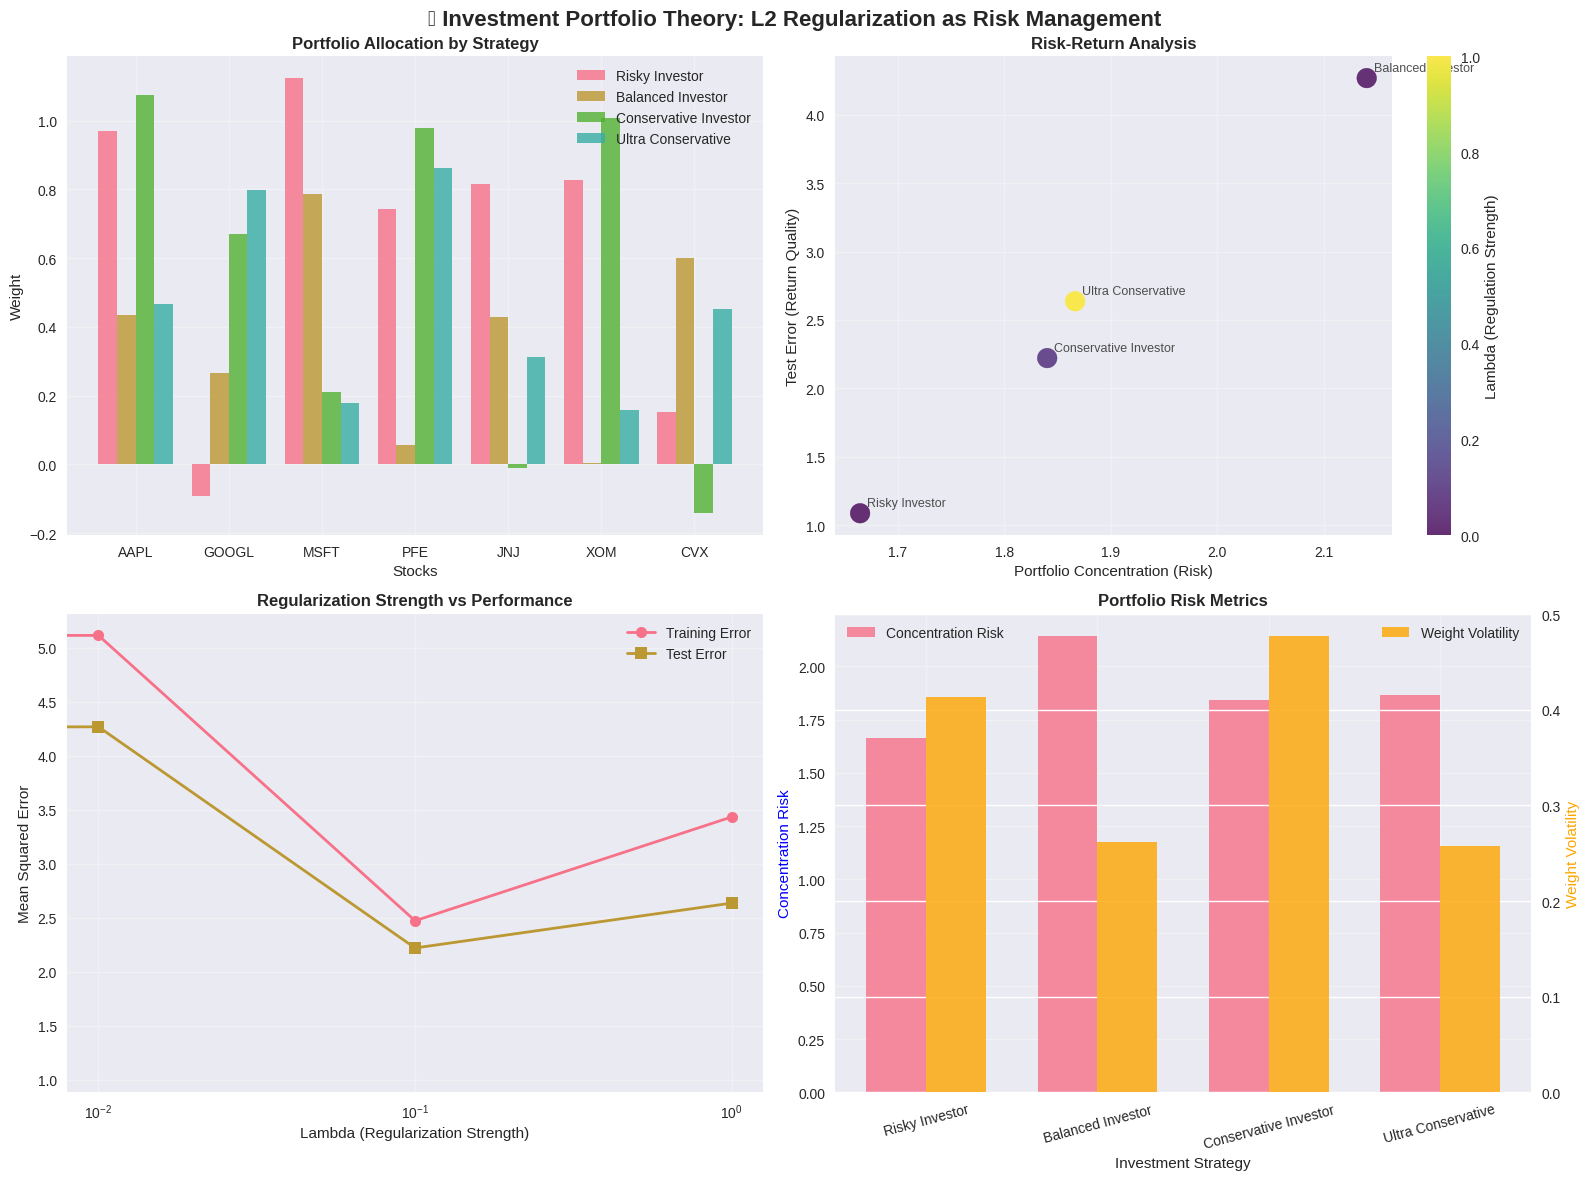

💼 Investment Strategy Analysis:
Risky Investor
(λ=0): Concentration=1.66, Volatility=0.413, Test MSE=1.086
Balanced Investor
(λ=0.01): Concentration=2.14, Volatility=0.262, Test MSE=4.268
Conservative Investor
(λ=0.1): Concentration=1.84, Volatility=0.477, Test MSE=2.221
Ultra Conservative
(λ=1.0): Concentration=1.87, Volatility=0.258, Test MSE=2.636

💡 Key Insights:
📈 Higher λ → More diversified portfolio (lower concentration)
⚖️ L2 regularization prevents over-investment in any single feature
🎯 Sweet spot balances bias (diversification) vs variance (specialization)


In [6]:
def demonstrate_investment_portfolio_theory():
    """
    💼 Investment Portfolio Theory: L2 Regularization as Risk Management

    Shows how L2 regularization distributes weight risk like a diversified portfolio
    """
    # Create correlated features (like correlated stocks)
    np.random.seed(42)
    n_samples = 200

    # Create base features (market sectors)
    tech_sector = np.random.randn(n_samples)
    health_sector = np.random.randn(n_samples)
    energy_sector = np.random.randn(n_samples)

    # Create correlated features within each sector
    tech_stocks = np.column_stack([
        tech_sector + np.random.randn(n_samples) * 0.3,  # Apple-like
        tech_sector + np.random.randn(n_samples) * 0.3,  # Google-like
        tech_sector + np.random.randn(n_samples) * 0.3,  # Microsoft-like
    ])

    health_stocks = np.column_stack([
        health_sector + np.random.randn(n_samples) * 0.3,  # Pfizer-like
        health_sector + np.random.randn(n_samples) * 0.3,  # J&J-like
    ])

    energy_stocks = np.column_stack([
        energy_sector + np.random.randn(n_samples) * 0.3,  # Exxon-like
        energy_sector + np.random.randn(n_samples) * 0.3,  # Chevron-like
    ])

    # Combine all stocks
    X = np.column_stack([tech_stocks, health_stocks, energy_stocks])
    n_features = X.shape[1]

    # Create target (portfolio returns)
    true_returns = np.array([1.2, 1.0, 0.8, 0.9, 1.1, 0.7, 0.6])  # Expected returns per stock
    y = X @ true_returns + np.random.randn(n_samples) * 0.1

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Different investment strategies (regularization strengths)
    strategies = {
        'Risky Investor\n(λ=0)': 0.0,
        'Balanced Investor\n(λ=0.01)': 0.01,
        'Conservative Investor\n(λ=0.1)': 0.1,
        'Ultra Conservative\n(λ=1.0)': 1.0
    }

    results = {}

    for strategy_name, lambda_value in strategies.items():
        # Build model with L2 regularization
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(1, input_shape=(n_features,), use_bias=False,
                                kernel_regularizer=tf.keras.regularizers.l2(lambda_value))
        ])

        model.compile(optimizer='adam', loss='mse')
        model.fit(X_train, y_train, epochs=200, verbose=0)

        weights = model.layers[0].get_weights()[0].flatten()
        train_pred = model.predict(X_train, verbose=0).flatten()
        test_pred = model.predict(X_test, verbose=0).flatten()

        # Calculate portfolio metrics
        portfolio_concentration = np.max(np.abs(weights)) / np.mean(np.abs(weights))  # Risk concentration
        portfolio_volatility = np.std(weights)  # Weight volatility

        results[strategy_name] = {
            'weights': weights,
            'train_mse': mean_squared_error(y_train, train_pred),
            'test_mse': mean_squared_error(y_test, test_pred),
            'concentration': portfolio_concentration,
            'volatility': portfolio_volatility,
            'lambda': lambda_value
        }

    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('💼 Investment Portfolio Theory: L2 Regularization as Risk Management',
                fontsize=16, fontweight='bold')

    stock_names = ['AAPL', 'GOOGL', 'MSFT', 'PFE', 'JNJ', 'XOM', 'CVX']
    colors = ['blue', 'blue', 'blue', 'green', 'green', 'red', 'red']  # Sector colors

    # Portfolio allocation for each strategy
    ax = axes[0, 0]
    x = np.arange(len(stock_names))
    width = 0.2

    for idx, (strategy_name, result) in enumerate(results.items()):
        ax.bar(x + idx*width, result['weights'], width,
              label=strategy_name.split('\n')[0], alpha=0.8)

    ax.set_title('Portfolio Allocation by Strategy', fontweight='bold')
    ax.set_xlabel('Stocks')
    ax.set_ylabel('Weight')
    ax.set_xticks(x + width * 1.5)
    ax.set_xticklabels(stock_names)
    ax.legend()
    ax.grid(True, alpha=0.3)

    # Risk-Return Analysis
    ax = axes[0, 1]
    concentrations = [result['concentration'] for result in results.values()]
    test_errors = [result['test_mse'] for result in results.values()]
    lambdas = [result['lambda'] for result in results.values()]

    scatter = ax.scatter(concentrations, test_errors, s=200, c=lambdas,
                        cmap='viridis', alpha=0.8)

    for i, strategy in enumerate(results.keys()):
        ax.annotate(strategy.split('\n')[0],
                   (concentrations[i], test_errors[i]),
                   xytext=(5, 5), textcoords='offset points',
                   fontsize=9, alpha=0.8)

    ax.set_title('Risk-Return Analysis', fontweight='bold')
    ax.set_xlabel('Portfolio Concentration (Risk)')
    ax.set_ylabel('Test Error (Return Quality)')
    ax.grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=ax, label='Lambda (Regulation Strength)')

    # Lambda vs Performance
    ax = axes[1, 0]
    lambdas_plot = [result['lambda'] for result in results.values()]
    train_errors = [result['train_mse'] for result in results.values()]
    test_errors = [result['test_mse'] for result in results.values()]

    ax.plot(lambdas_plot, train_errors, 'o-', label='Training Error', linewidth=2, markersize=8)
    ax.plot(lambdas_plot, test_errors, 's-', label='Test Error', linewidth=2, markersize=8)
    ax.set_title('Regularization Strength vs Performance', fontweight='bold')
    ax.set_xlabel('Lambda (Regularization Strength)')
    ax.set_ylabel('Mean Squared Error')
    ax.set_xscale('log')
    ax.legend()
    ax.grid(True, alpha=0.3)

    # Portfolio diversification metrics
    ax = axes[1, 1]
    strategies_short = [name.split('\n')[0] for name in results.keys()]
    concentrations = [result['concentration'] for result in results.values()]
    volatilities = [result['volatility'] for result in results.values()]

    x = np.arange(len(strategies_short))
    width = 0.35

    ax.bar(x - width/2, concentrations, width, label='Concentration Risk', alpha=0.8)
    ax2 = ax.twinx()
    ax2.bar(x + width/2, volatilities, width, label='Weight Volatility',
           alpha=0.8, color='orange')

    ax.set_title('Portfolio Risk Metrics', fontweight='bold')
    ax.set_xlabel('Investment Strategy')
    ax.set_ylabel('Concentration Risk', color='blue')
    ax2.set_ylabel('Weight Volatility', color='orange')
    ax.set_xticks(x)
    ax.set_xticklabels(strategies_short, rotation=15)
    ax.grid(True, alpha=0.3)

    # Add legends
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

    print("💼 Investment Strategy Analysis:")
    for strategy, result in results.items():
        print(f"{strategy}: Concentration={result['concentration']:.2f}, Volatility={result['volatility']:.3f}, Test MSE={result['test_mse']:.3f}")

    print("\n💡 Key Insights:")
    print("📈 Higher λ → More diversified portfolio (lower concentration)")
    print("⚖️ L2 regularization prevents over-investment in any single feature")
    print("🎯 Sweet spot balances bias (diversification) vs variance (specialization)")

# Run the demonstration
demonstrate_investment_portfolio_theory()

## 🏥 Demo 6: The Model Doctor - Complete Diagnostic System

🏥 MODEL DOCTOR DEMONSTRATION

🏥 EXAMINING PATIENT A - THE HEALTHY STUDENT
------------------------------------------------------------

        🏥 MODEL MEDICAL REPORT

        📊 VITAL SIGNS:
        - Training Accuracy: 0.850
        - Validation Accuracy: 0.820
        - Performance Gap: 0.030
        - Validation Trend: stable

        🩺 DIAGNOSIS:
        Severity: HEALTHY
        Confidence: 50.0%

        Conditions Detected:
                1. Healthy Model - Patient is learning well

        💊 PRESCRIBED TREATMENTS:
                1. 🎯 Fine-tune Hyperparameters - Optimize further
        2. ✅ Continue Current Approach - Model is healthy
        3. 🔍 Monitor Closely - Watch for changes
        4. 🚀 Consider Deployment - Ready for production

        📅 FOLLOW-UP:
        - Monitor training progress closely
        - Re-evaluate after implementing treatments
        - Schedule check-up in 10-20 epochs

        👨‍⚕️ Dr. Neural Network, MD
        Specialist in Deep Learning Health


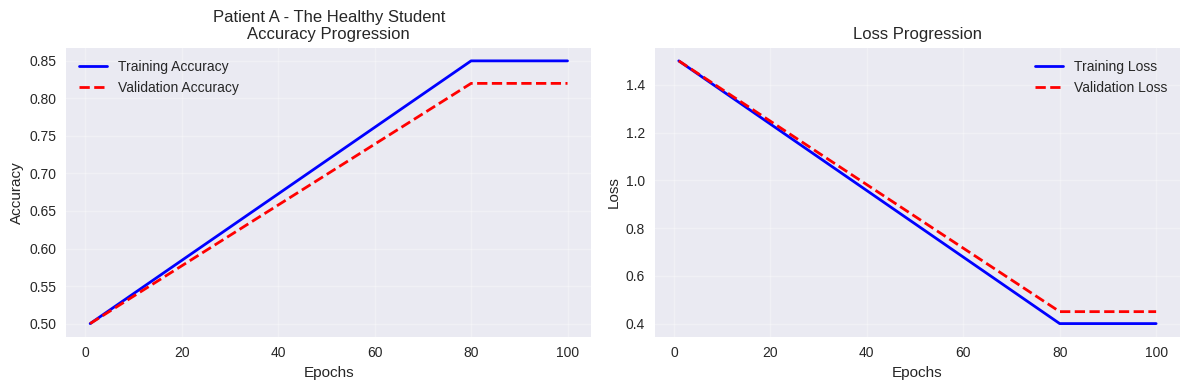


🏥 EXAMINING PATIENT B - THE CRAMMER (OVERFITTING)
------------------------------------------------------------

        🏥 MODEL MEDICAL REPORT

        📊 VITAL SIGNS:
        - Training Accuracy: 0.990
        - Validation Accuracy: 0.650
        - Performance Gap: 0.340
        - Validation Trend: declining

        🩺 DIAGNOSIS:
        Severity: CRITICAL
        Confidence: 100.0%

        Conditions Detected:
                1. Severe Overfitting - Patient is memorizing instead of learning
        2. Performance Degradation - Validation getting worse

        💊 PRESCRIBED TREATMENTS:
                1. 📉 Learning Rate Scheduling - Reduce learning rate
        2. 🛑 Early Stopping - Prevent further memorization
        3. 💽 More Training Data - Increase experience diversity
        4. 🧹 L1 Regularization (λ=0.01-0.1) - Marie Kondo treatment
        5. ⚖️ L2 Regularization (λ=0.001-0.01) - Portfolio balancing
        6. 🔄 Model Checkpointing - Save best version
        7. 🎯 Reduce Mod

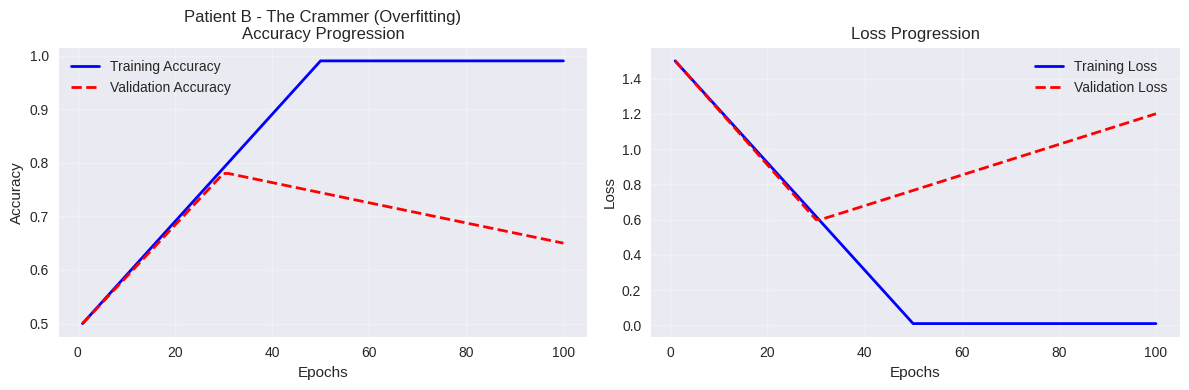


🏥 EXAMINING PATIENT C - THE STRUGGLING (UNDERFITTING)
------------------------------------------------------------

        🏥 MODEL MEDICAL REPORT

        📊 VITAL SIGNS:
        - Training Accuracy: 0.650
        - Validation Accuracy: 0.630
        - Performance Gap: 0.020
        - Validation Trend: stable

        🩺 DIAGNOSIS:
        Severity: MODERATE
        Confidence: 50.0%

        Conditions Detected:
                1. Underfitting - Patient needs more complexity to learn

        💊 PRESCRIBED TREATMENTS:
                1. 📉 Reduce Regularization - Lower λ values
        2. 🧠 Increase Model Complexity - Add more layers/neurons
        3. 📊 Check Data Quality - Ensure sufficient signal
        4. ⏰ Train Longer - Increase epochs
        5. 🔧 Feature Engineering - Create more informative features

        📅 FOLLOW-UP:
        - Monitor training progress closely
        - Re-evaluate after implementing treatments
        - Schedule check-up in 10-20 epochs

        👨‍⚕️ Dr. 

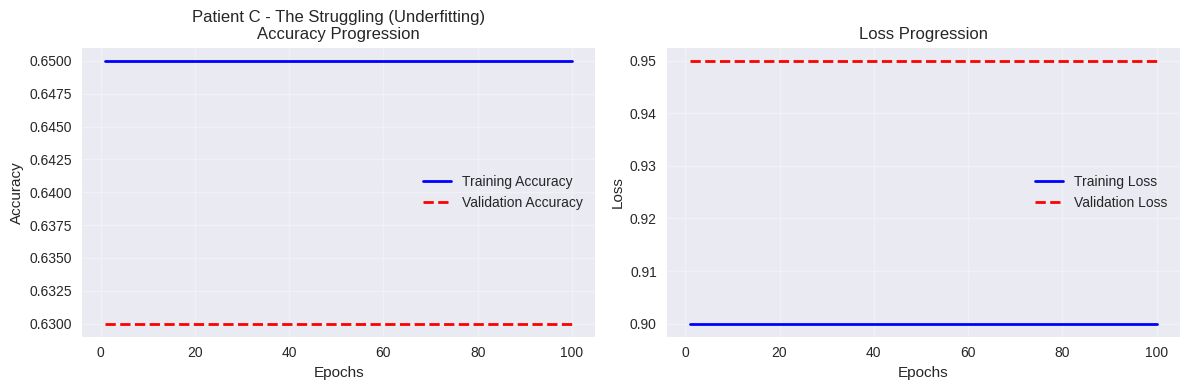


🎯 MODEL DOCTOR SUMMARY:
✅ Healthy models show small, stable train-validation gaps
⚠️ Overfitting shows large gaps and declining validation performance
📈 Underfitting shows poor performance on both training and validation
💊 Each condition requires different treatment approaches


In [7]:
class ModelDoctor:
    """
    🏥 The Model Doctor: Complete diagnostic and treatment system for ML models

    Like a medical doctor, diagnoses problems and prescribes treatments
    """

    def __init__(self):
        self.diagnostic_history = []

    def examine_patient(self, train_acc, val_acc, train_loss, val_loss, epochs):
        """
        🔍 Comprehensive health examination of the model
        """
        symptoms = {
            'final_train_acc': train_acc[-1],
            'final_val_acc': val_acc[-1],
            'final_train_loss': train_loss[-1],
            'final_val_loss': val_loss[-1],
            'acc_gap': abs(train_acc[-1] - val_acc[-1]),
            'loss_gap': abs(train_loss[-1] - val_loss[-1]),
            'val_trend': self._calculate_trend(val_acc[-20:]),  # Last 20 epochs
            'train_trend': self._calculate_trend(train_acc[-20:])
        }

        return symptoms

    def _calculate_trend(self, values):
        """Calculate if trend is improving, stable, or declining"""
        if len(values) < 5:
            return 'insufficient_data'

        # Simple linear trend
        x = np.arange(len(values))
        slope = np.polyfit(x, values, 1)[0]

        if slope > 0.001:
            return 'improving'
        elif slope < -0.001:
            return 'declining'
        else:
            return 'stable'

    def diagnose(self, symptoms):
        """
        🩺 Diagnose the model's condition
        """
        diagnosis = []
        severity = 'healthy'

        # Check for overfitting
        if (symptoms['final_train_acc'] > 0.9 and
            symptoms['final_val_acc'] < 0.8 and
            symptoms['acc_gap'] > 0.15):
            diagnosis.append("Severe Overfitting - Patient is memorizing instead of learning")
            severity = 'critical'
        elif symptoms['acc_gap'] > 0.1:
            diagnosis.append("Mild Overfitting - Some memorization detected")
            severity = 'moderate'

        # Check for underfitting
        if (symptoms['final_train_acc'] < 0.8 and
            symptoms['final_val_acc'] < 0.8 and
            symptoms['acc_gap'] < 0.05):
            diagnosis.append("Underfitting - Patient needs more complexity to learn")
            severity = 'moderate'

        # Check training progress
        if symptoms['val_trend'] == 'declining':
            diagnosis.append("Performance Degradation - Validation getting worse")
            severity = 'moderate' if severity == 'healthy' else severity

        if not diagnosis:
            diagnosis.append("Healthy Model - Patient is learning well")

        return {
            'diagnosis': diagnosis,
            'severity': severity,
            'confidence': self._calculate_confidence(symptoms)
        }

    def _calculate_confidence(self, symptoms):
        """Calculate diagnostic confidence based on clear symptoms"""
        confidence = 0.5  # Base confidence

        # Clear performance gap increases confidence
        if symptoms['acc_gap'] > 0.2:
            confidence += 0.3
        elif symptoms['acc_gap'] > 0.1:
            confidence += 0.2

        # Clear trends increase confidence
        if symptoms['val_trend'] in ['declining', 'improving']:
            confidence += 0.2

        return min(confidence, 1.0)

    def prescribe_treatment(self, diagnosis_result):
        """
        💊 Prescribe treatment based on diagnosis
        """
        treatments = []

        for diagnosis in diagnosis_result['diagnosis']:
            if 'Overfitting' in diagnosis:
                if 'Severe' in diagnosis:
                    treatments.extend([
                        "🧹 L1 Regularization (λ=0.01-0.1) - Marie Kondo treatment",
                        "⚖️ L2 Regularization (λ=0.001-0.01) - Portfolio balancing",
                        "🛑 Early Stopping - Prevent further memorization",
                        "💽 More Training Data - Increase experience diversity",
                        "🎯 Reduce Model Complexity - Simplify architecture"
                    ])
                else:
                    treatments.extend([
                        "⚖️ L2 Regularization (λ=0.001) - Light portfolio balancing",
                        "🛑 Early Stopping - Monitor and stop at optimal point",
                        "💽 Data Augmentation - Increase data diversity"
                    ])

            elif 'Underfitting' in diagnosis:
                treatments.extend([
                    "🧠 Increase Model Complexity - Add more layers/neurons",
                    "📉 Reduce Regularization - Lower λ values",
                    "🔧 Feature Engineering - Create more informative features",
                    "⏰ Train Longer - Increase epochs",
                    "📊 Check Data Quality - Ensure sufficient signal"
                ])

            elif 'Performance Degradation' in diagnosis:
                treatments.extend([
                    "🛑 Early Stopping - Stop before degradation",
                    "📉 Learning Rate Scheduling - Reduce learning rate",
                    "🔄 Model Checkpointing - Save best version"
                ])

            elif 'Healthy' in diagnosis:
                treatments.extend([
                    "✅ Continue Current Approach - Model is healthy",
                    "🔍 Monitor Closely - Watch for changes",
                    "🚀 Consider Deployment - Ready for production",
                    "🎯 Fine-tune Hyperparameters - Optimize further"
                ])

        return list(set(treatments))  # Remove duplicates

    def generate_medical_report(self, symptoms, diagnosis_result, treatments):
        """
        📋 Generate comprehensive medical report
        """
        report = f"""
        🏥 MODEL MEDICAL REPORT
        ========================

        📊 VITAL SIGNS:
        - Training Accuracy: {symptoms['final_train_acc']:.3f}
        - Validation Accuracy: {symptoms['final_val_acc']:.3f}
        - Performance Gap: {symptoms['acc_gap']:.3f}
        - Validation Trend: {symptoms['val_trend']}

        🩺 DIAGNOSIS:
        Severity: {diagnosis_result['severity'].upper()}
        Confidence: {diagnosis_result['confidence']:.1%}

        Conditions Detected:
        """

        for i, diag in enumerate(diagnosis_result['diagnosis'], 1):
            report += f"        {i}. {diag}\n"

        report += f"""
        💊 PRESCRIBED TREATMENTS:
        """

        for i, treatment in enumerate(treatments, 1):
            report += f"        {i}. {treatment}\n"

        report += f"""
        📅 FOLLOW-UP:
        - Monitor training progress closely
        - Re-evaluate after implementing treatments
        - Schedule check-up in 10-20 epochs

        👨‍⚕️ Dr. Neural Network, MD
        Specialist in Deep Learning Health
        """

        return report

def demonstrate_model_doctor():
    """
    🏥 Demonstrate the Model Doctor in action with different patient cases
    """
    print("🏥 MODEL DOCTOR DEMONSTRATION")
    print("="*50)

    doctor = ModelDoctor()

    # Create different patient scenarios
    patients = {
        "Patient A - The Healthy Student": {
            'train_acc': np.concatenate([np.linspace(0.5, 0.85, 80), np.full(20, 0.85)]),
            'val_acc': np.concatenate([np.linspace(0.5, 0.82, 80), np.full(20, 0.82)]),
            'train_loss': np.concatenate([np.linspace(1.5, 0.4, 80), np.full(20, 0.4)]),
            'val_loss': np.concatenate([np.linspace(1.5, 0.45, 80), np.full(20, 0.45)])
        },
        "Patient B - The Crammer (Overfitting)": {
            'train_acc': np.concatenate([np.linspace(0.5, 0.99, 50), np.full(50, 0.99)]),
            'val_acc': np.concatenate([np.linspace(0.5, 0.78, 30), np.linspace(0.78, 0.65, 70)]),
            'train_loss': np.concatenate([np.linspace(1.5, 0.01, 50), np.full(50, 0.01)]),
            'val_loss': np.concatenate([np.linspace(1.5, 0.6, 30), np.linspace(0.6, 1.2, 70)])
        },
        "Patient C - The Struggling (Underfitting)": {
            'train_acc': np.full(100, 0.65),
            'val_acc': np.full(100, 0.63),
            'train_loss': np.full(100, 0.9),
            'val_loss': np.full(100, 0.95)
        }
    }

    for patient_name, metrics in patients.items():
        print(f"\n🏥 EXAMINING {patient_name.upper()}")
        print("-" * 60)

        # Examine patient
        symptoms = doctor.examine_patient(
            metrics['train_acc'], metrics['val_acc'],
            metrics['train_loss'], metrics['val_loss'],
            epochs=100
        )

        # Diagnose
        diagnosis_result = doctor.diagnose(symptoms)

        # Prescribe treatment
        treatments = doctor.prescribe_treatment(diagnosis_result)

        # Generate and print report
        report = doctor.generate_medical_report(symptoms, diagnosis_result, treatments)
        print(report)

        # Visual diagnosis
        plt.figure(figsize=(12, 4))
        epochs = range(1, 101)

        plt.subplot(1, 2, 1)
        plt.plot(epochs, metrics['train_acc'], 'b-', label='Training Accuracy', linewidth=2)
        plt.plot(epochs, metrics['val_acc'], 'r--', label='Validation Accuracy', linewidth=2)
        plt.title(f'{patient_name}\nAccuracy Progression')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True, alpha=0.3)

        plt.subplot(1, 2, 2)
        plt.plot(epochs, metrics['train_loss'], 'b-', label='Training Loss', linewidth=2)
        plt.plot(epochs, metrics['val_loss'], 'r--', label='Validation Loss', linewidth=2)
        plt.title('Loss Progression')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    print("\n🎯 MODEL DOCTOR SUMMARY:")
    print("✅ Healthy models show small, stable train-validation gaps")
    print("⚠️ Overfitting shows large gaps and declining validation performance")
    print("📈 Underfitting shows poor performance on both training and validation")
    print("💊 Each condition requires different treatment approaches")

# Run the demonstration
demonstrate_model_doctor()

# 🎯 ASSESSMENT & INTERACTIVE EXERCISES

## 🧩 Exercise 1: Identify the Problem

🎯 INTERACTIVE EXERCISE: Problem Identification
Study the learning curves and identify the problem!


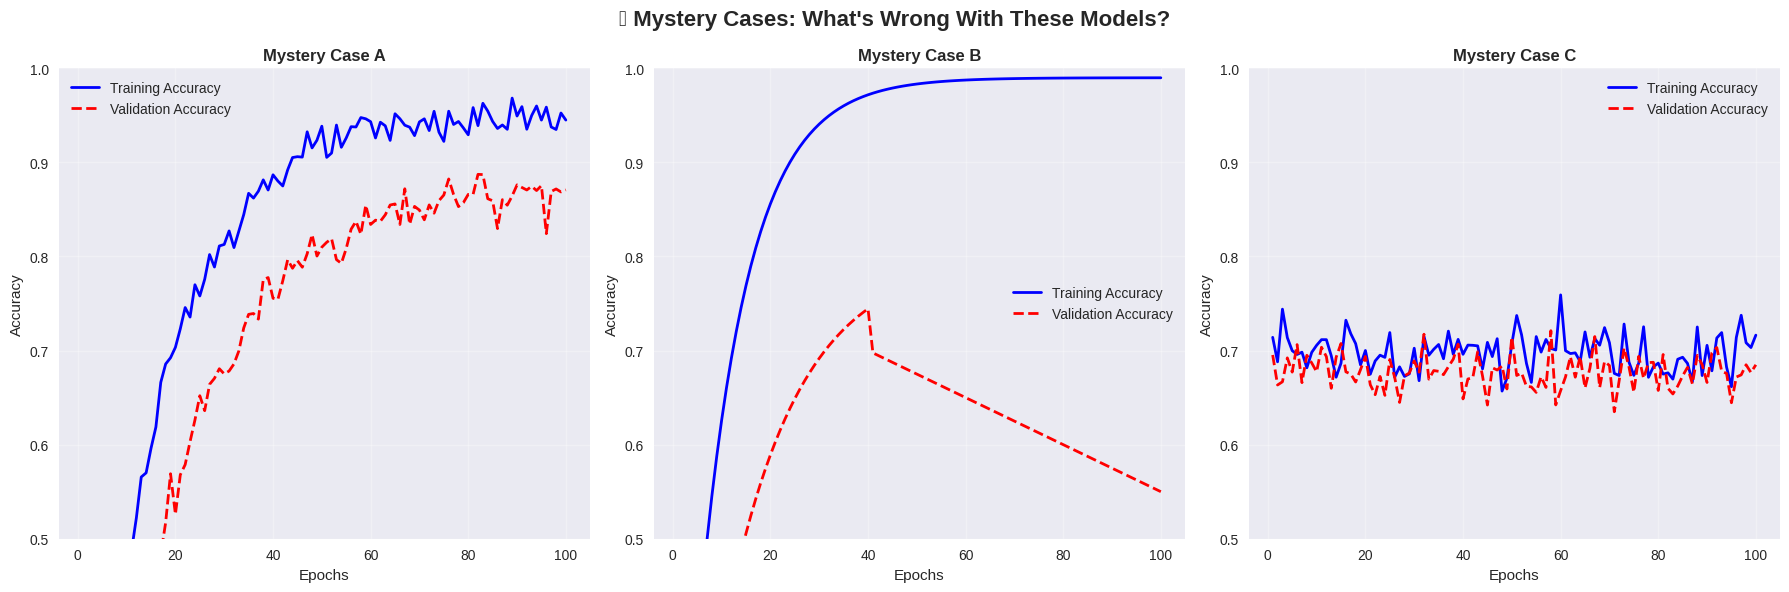


🤔 QUESTIONS FOR STUDENTS:
1. Which case shows healthy learning? Why?
2. Which case needs regularization? What type?
3. Which case needs more model complexity?
4. What would you do to fix each problematic case?

🎯 ANSWERS:
- Mystery Case A: Healthy Learning
- Mystery Case B: Overfitting
- Mystery Case C: Underfitting

💡 TREATMENT RECOMMENDATIONS:
- Case A: Continue current approach ✅
- Case B: Apply L1/L2 regularization, early stopping 🛑
- Case C: Increase model complexity, reduce regularization 📈


In [8]:
def interactive_problem_identification():
    """
    🧩 Interactive exercise: Students identify problems from learning curves
    """
    print("🎯 INTERACTIVE EXERCISE: Problem Identification")
    print("Study the learning curves and identify the problem!")
    print("="*60)

    # Create mystery cases
    np.random.seed(123)
    epochs = range(1, 101)

    cases = {
        "Mystery Case A": {
            'train_acc': 0.95 * (1 - np.exp(-np.array(epochs)/15)) + np.random.normal(0, 0.01, 100),
            'val_acc': 0.88 * (1 - np.exp(-np.array(epochs)/20)) + np.random.normal(0, 0.015, 100),
            'answer': 'Healthy Learning'
        },
        "Mystery Case B": {
            'train_acc': 0.99 * (1 - np.exp(-np.array(epochs)/10)),
            'val_acc': np.concatenate([0.8 * (1 - np.exp(-np.array(epochs[:40])/15)),
                                     0.8 - 0.15 * np.array(epochs[40:])/60]),
            'answer': 'Overfitting'
        },
        "Mystery Case C": {
            'train_acc': 0.7 * np.ones(100) + np.random.normal(0, 0.02, 100),
            'val_acc': 0.68 * np.ones(100) + np.random.normal(0, 0.02, 100),
            'answer': 'Underfitting'
        }
    }

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('🔍 Mystery Cases: What\'s Wrong With These Models?', fontsize=16, fontweight='bold')

    for idx, (case_name, data) in enumerate(cases.items()):
        ax = axes[idx]
        ax.plot(epochs, data['train_acc'], 'b-', label='Training Accuracy', linewidth=2)
        ax.plot(epochs, data['val_acc'], 'r--', label='Validation Accuracy', linewidth=2)
        ax.set_title(case_name, fontweight='bold')
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Accuracy')
        ax.legend()
        ax.grid(True, alpha=0.3)
        ax.set_ylim(0.5, 1.0)

    plt.tight_layout()
    plt.show()

    print("\n🤔 QUESTIONS FOR STUDENTS:")
    print("1. Which case shows healthy learning? Why?")
    print("2. Which case needs regularization? What type?")
    print("3. Which case needs more model complexity?")
    print("4. What would you do to fix each problematic case?")

    # Reveal answers after students discuss
    print("\n" + "="*50)
    print("🎯 ANSWERS:")
    for case_name, data in cases.items():
        print(f"- {case_name}: {data['answer']}")

    print("\n💡 TREATMENT RECOMMENDATIONS:")
    print("- Case A: Continue current approach ✅")
    print("- Case B: Apply L1/L2 regularization, early stopping 🛑")
    print("- Case C: Increase model complexity, reduce regularization 📈")

# Run the exercise
interactive_problem_identification()

## 📊 Exercise 2: Regularization Parameter Tuning

🎛️ INTERACTIVE EXERCISE: Regularization Parameter Tuning
Find the sweet spot for lambda (λ) values!
🔄 Testing different lambda values...


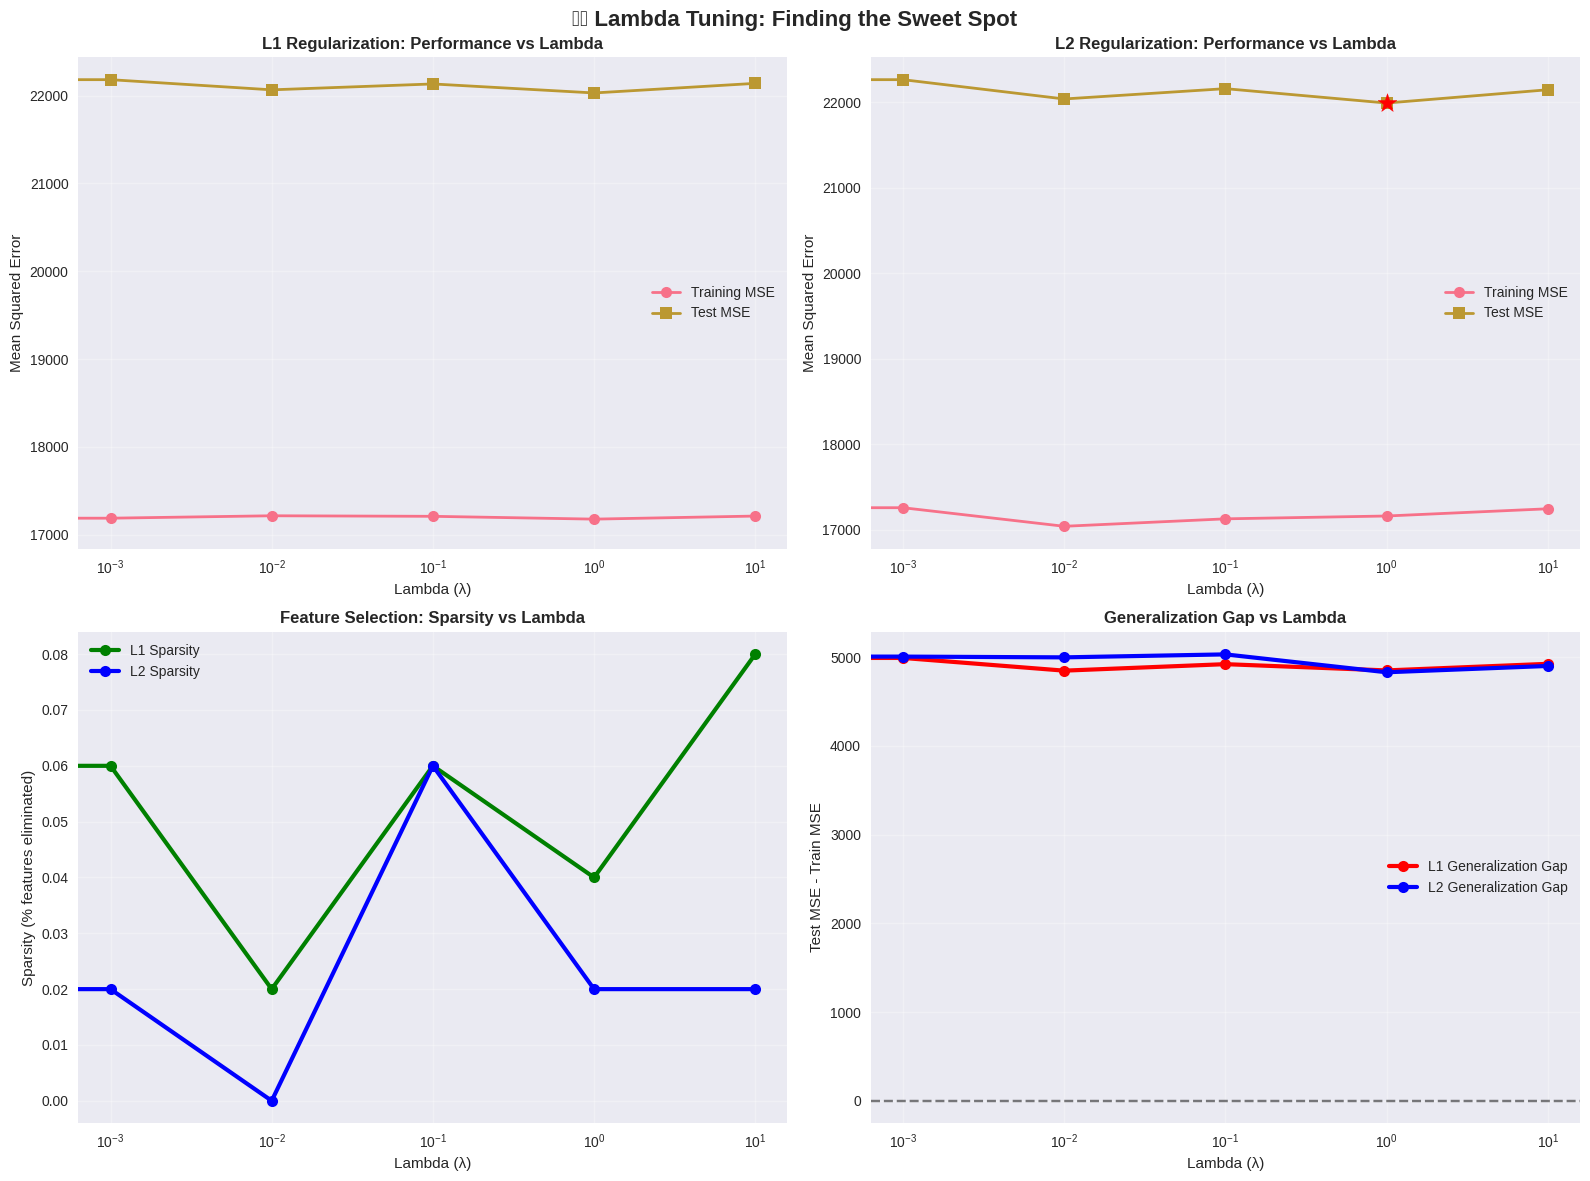


🎯 TUNING RESULTS:
📍 Optimal L1 Lambda: 0.0 (Test MSE: 21961.847)
📍 Optimal L2 Lambda: 1.0 (Test MSE: 21989.518)

📊 LAMBDA TUNING GUIDELINES:
🔍 Too Small (λ < 0.001): Minimal regularization effect
⚖️ Just Right (λ = 0.001-0.1): Balanced bias-variance tradeoff
🛑 Too Large (λ > 1.0): Over-regularization, high bias

💡 PRACTICAL TIPS:
1. Start with cross-validation to find optimal λ
2. Monitor both training and validation performance
3. L1 typically needs higher λ values than L2
4. The optimal λ depends on your dataset and model


In [9]:
def regularization_tuning_exercise():
    """
    📊 Interactive exercise: Find the optimal regularization parameter
    """
    print("🎛️ INTERACTIVE EXERCISE: Regularization Parameter Tuning")
    print("Find the sweet spot for lambda (λ) values!")
    print("="*60)

    # Create overfitting-prone dataset
    np.random.seed(42)
    X, y = make_regression(n_samples=100, n_features=50, noise=0.1, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Test different lambda values
    lambda_values = [0.0, 0.001, 0.01, 0.1, 1.0, 10.0]

    l1_results = {'train_mse': [], 'test_mse': [], 'sparsity': []}
    l2_results = {'train_mse': [], 'test_mse': [], 'sparsity': []}

    print("🔄 Testing different lambda values...")

    for lambda_val in lambda_values:
        # L1 model
        if lambda_val == 0.0:
            l1_model = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape=(50,))])
        else:
            l1_model = tf.keras.Sequential([
                tf.keras.layers.Dense(1, input_shape=(50,),
                                    kernel_regularizer=tf.keras.regularizers.l1(lambda_val))
            ])

        l1_model.compile(optimizer='adam', loss='mse')
        l1_model.fit(X_train, y_train, epochs=100, verbose=0)

        l1_train_pred = l1_model.predict(X_train, verbose=0)
        l1_test_pred = l1_model.predict(X_test, verbose=0)
        l1_weights = l1_model.layers[0].get_weights()[0].flatten()

        l1_results['train_mse'].append(mean_squared_error(y_train, l1_train_pred))
        l1_results['test_mse'].append(mean_squared_error(y_test, l1_test_pred))
        l1_results['sparsity'].append(np.sum(np.abs(l1_weights) < 0.01) / len(l1_weights))

        # L2 model
        if lambda_val == 0.0:
            l2_model = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape=(50,))])
        else:
            l2_model = tf.keras.Sequential([
                tf.keras.layers.Dense(1, input_shape=(50,),
                                    kernel_regularizer=tf.keras.regularizers.l2(lambda_val))
            ])

        l2_model.compile(optimizer='adam', loss='mse')
        l2_model.fit(X_train, y_train, epochs=100, verbose=0)

        l2_train_pred = l2_model.predict(X_train, verbose=0)
        l2_test_pred = l2_model.predict(X_test, verbose=0)
        l2_weights = l2_model.layers[0].get_weights()[0].flatten()

        l2_results['train_mse'].append(mean_squared_error(y_train, l2_train_pred))
        l2_results['test_mse'].append(mean_squared_error(y_test, l2_test_pred))
        l2_results['sparsity'].append(np.sum(np.abs(l2_weights) < 0.01) / len(l2_weights))

    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('🎛️ Lambda Tuning: Finding the Sweet Spot', fontsize=16, fontweight='bold')

    # Training vs Test Error for L1
    ax = axes[0, 0]
    ax.plot(lambda_values, l1_results['train_mse'], 'o-', label='Training MSE', linewidth=2, markersize=8)
    ax.plot(lambda_values, l1_results['test_mse'], 's-', label='Test MSE', linewidth=2, markersize=8)
    ax.set_title('L1 Regularization: Performance vs Lambda', fontweight='bold')
    ax.set_xlabel('Lambda (λ)')
    ax.set_ylabel('Mean Squared Error')
    ax.set_xscale('log')
    ax.legend()
    ax.grid(True, alpha=0.3)

    # Mark optimal point for L1
    optimal_l1_idx = np.argmin(l1_results['test_mse'])
    ax.scatter([lambda_values[optimal_l1_idx]], [l1_results['test_mse'][optimal_l1_idx]],
              color='red', s=200, marker='*', zorder=5, label='Optimal λ')

    # Training vs Test Error for L2
    ax = axes[0, 1]
    ax.plot(lambda_values, l2_results['train_mse'], 'o-', label='Training MSE', linewidth=2, markersize=8)
    ax.plot(lambda_values, l2_results['test_mse'], 's-', label='Test MSE', linewidth=2, markersize=8)
    ax.set_title('L2 Regularization: Performance vs Lambda', fontweight='bold')
    ax.set_xlabel('Lambda (λ)')
    ax.set_ylabel('Mean Squared Error')
    ax.set_xscale('log')
    ax.legend()
    ax.grid(True, alpha=0.3)

    # Mark optimal point for L2
    optimal_l2_idx = np.argmin(l2_results['test_mse'])
    ax.scatter([lambda_values[optimal_l2_idx]], [l2_results['test_mse'][optimal_l2_idx]],
              color='red', s=200, marker='*', zorder=5, label='Optimal λ')

    # Sparsity comparison
    ax = axes[1, 0]
    ax.plot(lambda_values, l1_results['sparsity'], 'go-', label='L1 Sparsity', linewidth=3, markersize=8)
    ax.plot(lambda_values, l2_results['sparsity'], 'bo-', label='L2 Sparsity', linewidth=3, markersize=8)
    ax.set_title('Feature Selection: Sparsity vs Lambda', fontweight='bold')
    ax.set_xlabel('Lambda (λ)')
    ax.set_ylabel('Sparsity (% features eliminated)')
    ax.set_xscale('log')
    ax.legend()
    ax.grid(True, alpha=0.3)

    # Bias-Variance Tradeoff Visualization
    ax = axes[1, 1]
    l1_gaps = np.array(l1_results['test_mse']) - np.array(l1_results['train_mse'])
    l2_gaps = np.array(l2_results['test_mse']) - np.array(l2_results['train_mse'])

    ax.plot(lambda_values, l1_gaps, 'ro-', label='L1 Generalization Gap', linewidth=3, markersize=8)
    ax.plot(lambda_values, l2_gaps, 'bo-', label='L2 Generalization Gap', linewidth=3, markersize=8)
    ax.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    ax.set_title('Generalization Gap vs Lambda', fontweight='bold')
    ax.set_xlabel('Lambda (λ)')
    ax.set_ylabel('Test MSE - Train MSE')
    ax.set_xscale('log')
    ax.legend()
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print("\n🎯 TUNING RESULTS:")
    print(f"📍 Optimal L1 Lambda: {lambda_values[optimal_l1_idx]} (Test MSE: {l1_results['test_mse'][optimal_l1_idx]:.3f})")
    print(f"📍 Optimal L2 Lambda: {lambda_values[optimal_l2_idx]} (Test MSE: {l2_results['test_mse'][optimal_l2_idx]:.3f})")

    print("\n📊 LAMBDA TUNING GUIDELINES:")
    print("🔍 Too Small (λ < 0.001): Minimal regularization effect")
    print("⚖️ Just Right (λ = 0.001-0.1): Balanced bias-variance tradeoff")
    print("🛑 Too Large (λ > 1.0): Over-regularization, high bias")

    print("\n💡 PRACTICAL TIPS:")
    print("1. Start with cross-validation to find optimal λ")
    print("2. Monitor both training and validation performance")
    print("3. L1 typically needs higher λ values than L2")
    print("4. The optimal λ depends on your dataset and model")

# Run the exercise
regularization_tuning_exercise()

# 🎓 SUMMARY & NEXT STEPS

## 🎯 Key Takeaways from Today's Session

In [10]:
def generate_session_summary():
    """
    🎓 Generate comprehensive summary of today's learning
    """
    print("🎓 SESSION SUMMARY: Week 6 Day 3")
    print("="*50)

    summary = {
        "🍽️ Core Analogies Learned": [
            "Restaurant Chef → Bias-Variance Tradeoff",
            "Archer's Target → Error Components",
            "Student Cramming → Overfitting Detection",
            "Marie Kondo → L1 Regularization",
            "Equal Opportunity → L2 Regularization",
            "Investment Portfolio → Risk Diversification"
        ],

        "📊 Mathematical Concepts Mastered": [
            "Total Error = Bias² + Variance + Irreducible Error",
            "L1 Penalty: λ∑|wᵢ| (Diamond constraint)",
            "L2 Penalty: λ∑wᵢ² (Circle constraint)",
            "Sparsity vs Weight Smoothing",
            "Hyperparameter Tuning Strategies"
        ],

        "💻 Practical Skills Developed": [
            "TensorFlow L1/L2 implementation",
            "Overfitting detection systems",
            "Learning curve analysis",
            "Model diagnostic tools",
            "Regularization parameter tuning"
        ],

        "🎯 Assessment Readiness": [
            "Unit Test 1 preparation (Sep 19)",
            "Tutorial T6 implementation skills",
            "CO-1 & CO-2 learning outcomes",
            "Real-world problem solving"
        ]
    }

    for category, items in summary.items():
        print(f"\n{category}:")
        for item in items:
            print(f"  ✅ {item}")

    print("\n🏠 HOMEWORK FOR TONIGHT:")
    homework = [
        "Complete Tutorial T6 - L1/L2 implementation",
        "Practice identifying overfitting from learning curves",
        "Review mathematical derivations for penalties",
        "Explain concepts to a friend using our analogies",
        "Prepare for advanced regularization (Day 4)"
    ]

    for i, task in enumerate(homework, 1):
        print(f"  {i}. {task}")

    print("\n🔮 PREVIEW: Day 4 - Advanced Regularization")
    preview = [
        "Dropout: The Random Absence Policy",
        "Batch Normalization: Team Coordination",
        "Data Augmentation: Experience Multiplier",
        "Early Stopping: Perfect Timing Strategy"
    ]

    for technique in preview:
        print(f"  🎯 {technique}")

    print("\n💬 FINAL WISDOM:")
    print('"The art of machine learning is not in building perfect models,"')
    print('"but in building models that fail gracefully and generalize beautifully."')
    print("\n👨‍🏫 Remember: Every expert was once a beginner!")

# Generate summary
generate_session_summary()

🎓 SESSION SUMMARY: Week 6 Day 3

🍽️ Core Analogies Learned:
  ✅ Restaurant Chef → Bias-Variance Tradeoff
  ✅ Archer's Target → Error Components
  ✅ Student Cramming → Overfitting Detection
  ✅ Marie Kondo → L1 Regularization
  ✅ Equal Opportunity → L2 Regularization
  ✅ Investment Portfolio → Risk Diversification

📊 Mathematical Concepts Mastered:
  ✅ Total Error = Bias² + Variance + Irreducible Error
  ✅ L1 Penalty: λ∑|wᵢ| (Diamond constraint)
  ✅ L2 Penalty: λ∑wᵢ² (Circle constraint)
  ✅ Sparsity vs Weight Smoothing
  ✅ Hyperparameter Tuning Strategies

💻 Practical Skills Developed:
  ✅ TensorFlow L1/L2 implementation
  ✅ Overfitting detection systems
  ✅ Learning curve analysis
  ✅ Model diagnostic tools
  ✅ Regularization parameter tuning

🎯 Assessment Readiness:
  ✅ Unit Test 1 preparation (Sep 19)
  ✅ Tutorial T6 implementation skills
  ✅ CO-1 & CO-2 learning outcomes
  ✅ Real-world problem solving

🏠 HOMEWORK FOR TONIGHT:
  1. Complete Tutorial T6 - L1/L2 implementation
  2. Pra

---

## 📚 Resources for Continued Learning

### 📖 Required Reading
- **Goodfellow et al., "Deep Learning" (2016)**: Chapter 7 - Regularization for Deep Learning
- **Chollet, "Deep Learning with Python" (2018)**: Chapter 4.4 - Overfitting and Underfitting

### 🔗 Online Resources
- [TensorFlow Regularizers Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/regularizers)
- [Interactive Bias-Variance Decomposition](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Regularization in Neural Networks (Visual Guide)](https://towardsdatascience.com/regularization-in-neural-networks-explained-with-code-8f11f7a4a0d3)

### 💡 Additional Practice
- Experiment with different λ values on your own datasets
- Try combining L1 and L2 (Elastic Net regularization)
- Implement regularization from scratch using NumPy

---

*© 2025 Prof. Ramesh Babu | SRM University | Deep Neural Network Architectures*  
*"Making AI Accessible Through Analogies"*